In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os

In [2]:
def extract_key_from_json(data, key):
    """Recursively extract value of a specified key from nested JSON-like structures. """
    if isinstance(data, list):
        values = []
        for item in data:
            values.extend(extract_key_from_json(item, key))
        return values
    elif isinstance(data, dict):
        values = []
        for k, v in data.items():
            if k == key:
                values.append(v)
            else:
                values.extend(extract_key_from_json(v, key))
        return values
    else:
        return []
    
def extract_per_subtask_metric(data, metric_key) -> dict[str, float]:
    """Extract per subtask metric from the Json data. Returned as a dictionary mapping task names to their respective metric values."""
    # look through the nested structure to find the subtask with the metric_key
    result = {}
    if isinstance(data, list):
        for item in data:
            result.update(extract_per_subtask_metric(item, metric_key))
    elif isinstance(data, dict):
        for k, v in data.items():
            if metric_key in v:
                result[k] = v[metric_key]
            else:
                result.update(extract_per_subtask_metric(v, metric_key))
    return result

def barplot(dataframe, title, ylabel, xlabel, save_path, y='Exact Match Rate'):
    # set seaborn style
    sns.set_theme(style='darkgrid')
    # each dataframe contains a column indicating the model (gpt5 or pi0), a column indicating the task, and a column indicating the emr
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Task', y=y, hue='Model', data=dataframe)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    plt.ylim(0, 1)
    plt.legend(title='Model')
    plt.savefig(save_path)
    plt.show()

# mapping from different ways of naming the same subtask in openx results
openx_subtasks_mapping = {
    'openx_bimanual': 'bimanual',
    'openx_quadrupedal': 'quadrupedal',
    'openx_mobile_manipulation': 'mobile_manipulation',
    'openx_single_arm': 'single_arm',
    'openx_wheeled_robot': 'wheeled_robot',
    'berkeley_gnm_sac_son': 'wheeled_robot',
    'utokyo_saytap_converted_externally_to_rlds':'quadrupedal',
    'bridge': 'single_arm',
    'utokyo_arm_bimanual_converted_externally_to_rlds': 'bimanual',
    'fractal20220817_data': 'mobile_manipulation',
}

In [3]:
# load the openx json file
with open('./pi0/pi0_base_openx_results_final.json') as f:
    pi0_base_openx = json.load(f)
# load the overcooked json file
with open('./pi0/pi0_base_overcooked_results.json') as f:
    pi0_base_overcooked = json.load(f)
# load the hf bfcl inference results json file
with open('./pi0/pi0_hf_bfcl_inference_results.json') as f:
    pi0_hf_bfcl_inference = json.load(f)
# load the hf piqa results json file
with open('./pi0/pi0_hf_piqa_inference_results.json') as f:
    pi0_hf_piqa = json.load(f)
# load the hf robovqa results json file
with open('./pi0/pi0_hf_robovqa_inference_results.json') as f:
    pi0_hf_robovqa = json.load(f)
# load the hf sqa3d results json file
with open('./pi0/pi0_hf_sqa3d_inference_results.json') as f:
    pi0_hf_sqa3d = json.load(f)
# load all the json files in the odinw folder
pi0_odinw_results = []
for file in os.listdir('./pi0/odinw'):
    if file.endswith('.json'):
        with open(os.path.join('./pi0/odinw', file)) as f:
            pi0_odinw_results.append(json.load(f))

In [4]:
# load the all openx json files
gpt5_openx = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/openx'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/openx', file)) as f:
            gpt5_openx.append(json.load(f))
# load all odinw json files
gpt5_odinw = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/odinw'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/odinw', file)) as f:
            gpt5_odinw.append(json.load(f))
# load all overcooked json files
gpt5_overcooked = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/overcooked_ai'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/overcooked_ai', file)) as f:
            gpt5_overcooked.append(json.load(f))
# load all piqa json files
gpt5_piqa = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/piqa'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/piqa', file)) as f:
            gpt5_piqa.append(json.load(f))
# load all robot_vqa json files
gpt5_robovqa = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/robot_vqa'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/robot_vqa', file)) as f:
            gpt5_robovqa.append(json.load(f))
# load all sqa3d json files
gpt5_sqa3d = []
for file in os.listdir('./genesis/gpt_5/low_reasoning/sqa3d'):
    if file.endswith('.json'):
        with open(os.path.join('./genesis/gpt_5/low_reasoning/sqa3d', file)) as f:
            gpt5_sqa3d.append(json.load(f))

In [5]:
# load the openx json file
with open('./magma/magma_openx_results_final.json') as f:
    magma_openx = json.load(f)
# # load the overcooked json file
# with open('./magma/magma_overcooked_results.json') as f:
#     magma_overcooked = json.load(f)
# # load the hf bfcl inference results json file
# with open('./magma/magma_bfcl_inference_results.json') as f:
#     magma_bfcl_inference = json.load(f)
# load the hf piqa results json file
with open('./magma/piqa_results.json') as f:
    magma_piqa = json.load(f)
# load the hf robovqa results json file
with open('./magma/robovqa_results.json') as f:
    magma_robovqa = json.load(f)
# load the hf sqa3d results json file
with open('./magma/sqa3d_results.json') as f:
    magma_sqa3d = json.load(f)
# load all the json files in the odinw folder
magma_odinw_results = []
for file in os.listdir('./magma/odinw/corrected_results'):
    if file.endswith('.json'):
        with open(os.path.join('./magma/odinw/corrected_results', file)) as f:
            magma_odinw_results.append(json.load(f))

In [6]:
gpt5_piqa_emr = extract_key_from_json(gpt5_piqa, key='exact_match_rate')
pi0_piqa_emr = extract_key_from_json(pi0_hf_piqa, key='exact_match_rate')
magma_piqa_emr = extract_key_from_json(magma_piqa, key='exact_match_rate')
print("pi0 piqa emr:", pi0_piqa_emr, "gpt5 piqa emr:", gpt5_piqa_emr, "magma piqa emr:", magma_piqa_emr)

pi0 piqa emr: [0.0] gpt5 piqa emr: [0.9577508543025784] magma piqa emr: [0.6945048121701335]


In [7]:
gpt5_bfcl_emr = [28.5]
pi0_bfcl_emr = extract_key_from_json(pi0_hf_bfcl_inference, key='exact_match_accuracy')
# magma_bfcl_emr = extract_key_from_json(magma_bfcl_inference, key='exact_match_accuracy')
print("pi0 bfcl emr:", pi0_bfcl_emr)

pi0 bfcl emr: [0.0]


In [8]:
gpt5_sqa3d_emr = extract_key_from_json(gpt5_sqa3d, key='exact_match_rate')
pi0_sqa3d_emr = extract_key_from_json(pi0_hf_sqa3d, key='exact_match_rate')
magma_sqa3d_emr = extract_key_from_json(magma_sqa3d, key='exact_match_rate_with_invalids')
print("pi0 sqa3d emr:", pi0_sqa3d_emr, "gpt5 sqa3d emr:", gpt5_sqa3d_emr, "magma sqa3d emr:", magma_sqa3d_emr)

pi0 sqa3d emr: [0.0] gpt5 sqa3d emr: [0.4763688760806916] magma sqa3d emr: [0.3446685878962536]


In [9]:
gpt5_robovqa_emr = extract_key_from_json(gpt5_robovqa, key='exact_match_rate')
pi0_robovqa_emr = extract_key_from_json(pi0_hf_robovqa, key='exact_match_accuracy')
magma_robovqa_emr = extract_key_from_json(magma_robovqa, key='exact_match_rate_with_invalids')
print("pi0 robovqa emr:", pi0_robovqa_emr, "gpt5 robovqa emr:", gpt5_robovqa_emr, "magma robovqa emr:", magma_robovqa_emr)

pi0 robovqa emr: [0.0] gpt5 robovqa emr: [0.28] magma robovqa emr: [0.0825]


In [10]:
gpt5_overcooked_emr = extract_key_from_json(gpt5_overcooked, key='exact_match')[0]
pi0_overcooked_emr = extract_key_from_json(pi0_base_overcooked, key='exact_match_rate')
# magma_overcooked_emr = extract_key_from_json(magma_overcooked, key='exact_match_rate')
print("pi0 overcooked emr:", pi0_overcooked_emr, "gpt5 overcooked emr:", gpt5_overcooked_emr)

pi0 overcooked emr: [0.03956364992541024] gpt5 overcooked emr: 0.026292889109895575


In [11]:
# iterate through all the odinw results and extract the exact match rate
gpt5_odinw_emrs = []
for result in gpt5_odinw:
    gpt5_odinw_emrs.extend(extract_key_from_json(result, key='exact_match_rate'))
# iterate through all the pi0 odinw results and extract the exact match rate
pi0_odinw_emrs = []
for result in pi0_odinw_results:
    pi0_odinw_emrs.extend(extract_key_from_json(result, key='exact_match_rate'))

magma_odinw_emrs = []
for result in magma_odinw_results:
    magma_odinw_emrs.extend(extract_key_from_json(result, key='exact_match_rate_with_invalids'))
    
print("pi0 odinw emrs:", pi0_odinw_emrs, "gpt5 odinw emrs:", gpt5_odinw_emrs, "magma odinw emrs:", magma_odinw_emrs)

pi0 odinw emrs: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] gpt5 odinw emrs: [0.528, 0.718, 0.948, 0.8449612403100775, 1.0, 0.1, 0.5694444444444444, 0.3076923076923077, 0.288, 0.45594713656387664, 0.9895833333333334, 0.632, 0.5161290322580645, 0.7154989384288747, 0.104, 0.362, 0.856, 0.9629629629629629, 0.9655172413793104, 0.7555555555555555, 0.9449275362318841, 0.824, 0.45, 0.9893617021276596] magma odinw emrs: [0.9479166666666666, 0.114, 0.04405286343612335, 0.6451612903225806, 0.89, 0.542, 0.174, 0.102, 0.008492569002123142, 0.004, 0.094, 0.10372340425531915, 0.32, 0.7413793103448276, 0.041666666666666664, 0.6666666666666666, 0.20512820512820512, 0.01, 0.7906976744186046, 0.002, 0.692, 0.034782608695652174, 0.8888888888888888, 0.13333333333333333]


In [12]:
data = {
    'Task': ['PIQA', 'BFCL', 'SQA3D', 'RoboVQA', 'ODINW', 'Overcooked'],
    'GPT-5': [np.mean(gpt5_piqa_emr), 
                              None, 
                              np.mean(gpt5_sqa3d_emr), 
                              np.mean(gpt5_robovqa_emr), 
                              np.mean(gpt5_odinw_emrs), 
                              np.mean(gpt5_overcooked_emr)],
    'Pi-0': [np.mean(pi0_piqa_emr), 
                             np.mean(pi0_bfcl_emr), 
                             np.mean(pi0_sqa3d_emr), 
                             np.mean(pi0_robovqa_emr), 
                             np.mean(pi0_odinw_emrs), 
                             np.mean(pi0_overcooked_emr)],
    "Magma":[np.mean(magma_piqa_emr), 
                            None, #  np.mean(magma__bfcl_emr),
                             np.mean(magma_sqa3d_emr), 
                             np.mean(magma_robovqa_emr), 
                             np.mean(magma_odinw_emrs), 
                            None#  np.mean(magma_overcooked_emr)
                            ],
}
df = pd.DataFrame(data)
df

,Task,GPT-5,Pi-0,Magma
0,PIQA,0.957751,0.000000,0.694505
1,BFCL,NaN,0.000000,NaN
2,SQA3D,0.476369,0.000000,0.344669
3,RoboVQA,0.280000,0.000000,0.082500
4,ODINW,0.659483,0.000000,0.341495
5,Overcooked,0.026293,0.039564,NaN


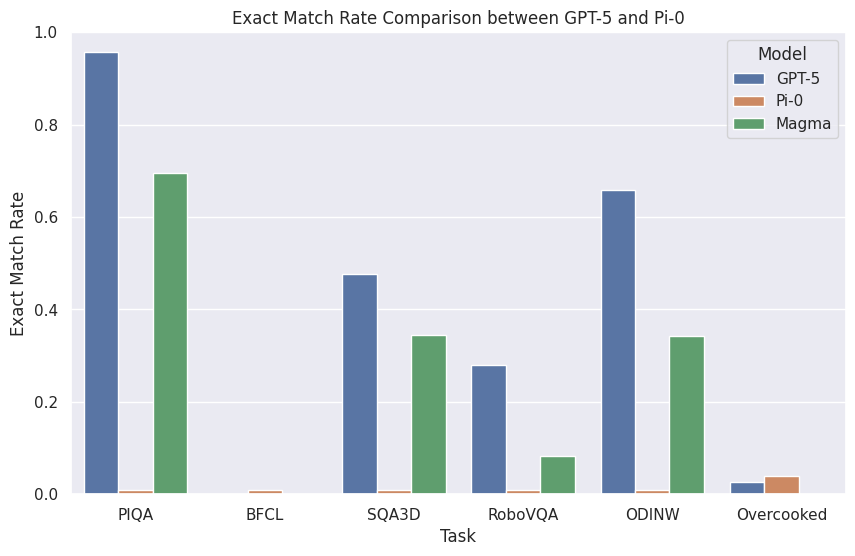

In [13]:
# if a data is 0, add a tiny value so it can be visualized on a barplot
df = df.replace(0, 0.01)
# reshape the dataframe to have a column for model and a column for emr
df_melted = df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0', 'Magma'], var_name='Model', value_name='Exact Match Rate')
barplot(df_melted, title='Exact Match Rate Comparison between GPT-5 and Pi-0', ylabel='Exact Match Rate', xlabel='Task', save_path='./emr_comparison.png')

In [15]:
gpt5_openx_namse = {}
for result in gpt5_openx:
    gpt5_openx_namse.update(extract_per_subtask_metric(result, metric_key='normalized_amse'))
pi0_openx_namse = extract_per_subtask_metric(pi0_base_openx, metric_key='normalized_amse')
magma_openx_namse = extract_per_subtask_metric(magma_openx, metric_key='normalized_amse')
# map the keys in pi0_openx_namse using the openx_subtasks_mapping
pi0_openx_namse_mapped = {openx_subtasks_mapping.get(k, k): v for k, v in pi0_openx_namse.items()}
# map the keys in magma_openx_namse using the openx_subtasks_mapping
magma_openx_namse_mapped = {openx_subtasks_mapping.get(k, k): v for k, v in magma_openx_namse.items()}
# map the keys in gpt5_openx_namse using the openx_subtasks_mapping
gpt5_openx_namse_mapped = {openx_subtasks_mapping.get(k, k): v for k, v in gpt5_openx_namse.items()}
# turn the two dicts into a dataframe
# task names are the values in the openx_subtasks_mapping
task_names = list(set(openx_subtasks_mapping.values()))
# 
openx_data = {'Task': task_names,
              'GPT-5': [gpt5_openx_namse_mapped.get(task, 0) for task in task_names],
              'Pi-0': [pi0_openx_namse_mapped.get(task, 0) for task in task_names],
              'Magma': [magma_openx_namse_mapped.get(task, 0) for task in task_names]}
openx_df = pd.DataFrame(openx_data)
openx_df

,Task,GPT-5,Pi-0,Magma
0,quadrupedal,0.013032,0.104683,0.000000
1,wheeled_robot,0.076121,0.222708,0.082150
2,mobile_manipulation,0.087194,0.075309,0.059051
3,single_arm,0.061501,0.059306,0.121135
4,bimanual,0.000000,0.109930,0.247230


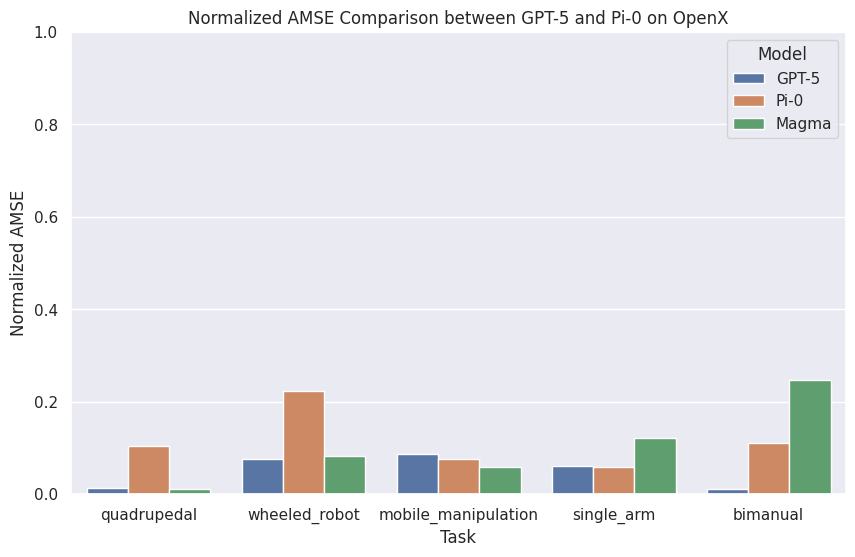

In [16]:
# replace 0 with a tiny value so it can be visualized on a barplot
openx_df = openx_df.replace(0, 0.01)
# make it a melted dataframe
openx_df_melted = openx_df.melt(id_vars=['Task'], value_vars=['GPT-5', 'Pi-0','Magma'], var_name='Model', value_name='Normalized AMSE')
barplot(openx_df_melted, title='Normalized AMSE Comparison between GPT-5 and Pi-0 on OpenX', ylabel='Normalized AMSE', xlabel='Task', y='Normalized AMSE', save_path='./openx_namse_comparison.png')